In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Importing the data
data = pd.read_csv(r"D:\Visual Studio Code\ML\DataSet\winequality-red1.csv")
data.shape

(1599, 12)

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Checking for missing value
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


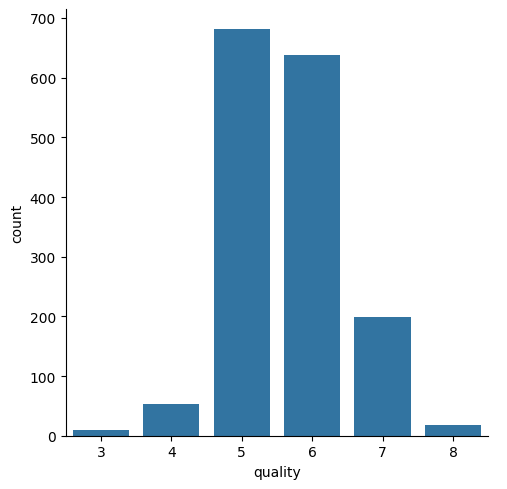

In [6]:
#Number of values in quality columns 
sns.catplot(x='quality',data= data , kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

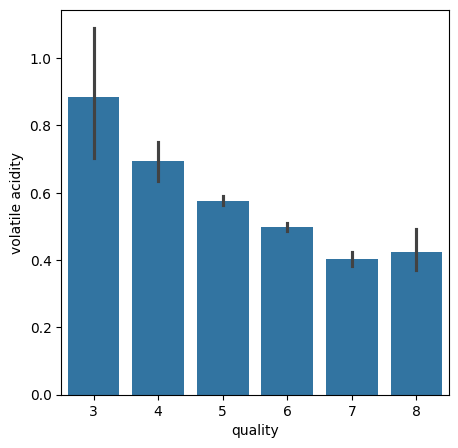

In [7]:
# volatile acidity vs quality 
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data= data)

<Axes: xlabel='quality', ylabel='citric acid'>

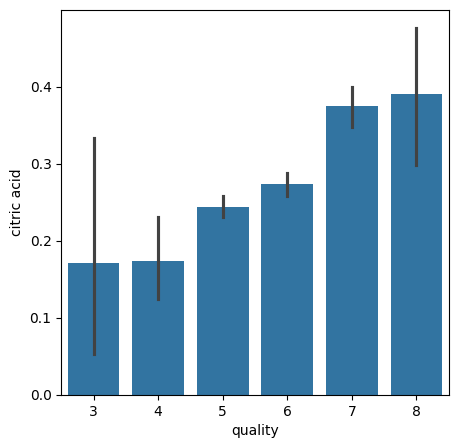

In [8]:
#citric acid vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=data)

<Axes: xlabel='quality', ylabel='pH'>

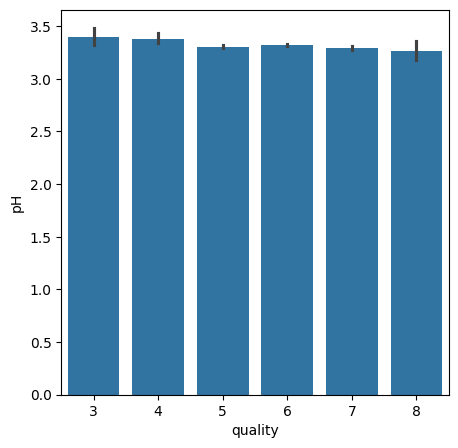

In [9]:
# pH vs quality 
plt.figure(figsize=(5,5))
sns.barplot(x="quality",y='pH',data = data)

<Axes: xlabel='quality', ylabel='residual sugar'>

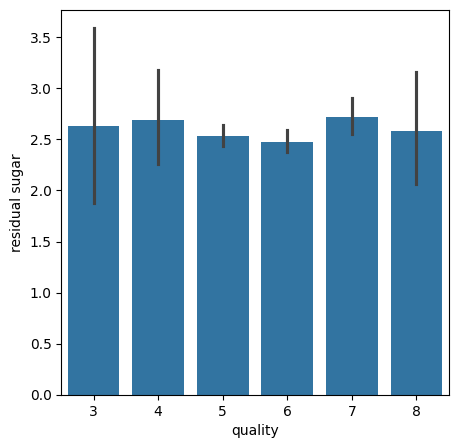

In [10]:
# residual sugar vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data= data)

<Axes: xlabel='quality', ylabel='chlorides'>

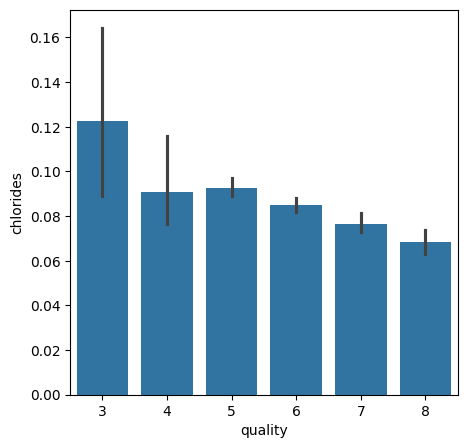

In [11]:
#chlorides vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=data)

<Axes: xlabel='quality', ylabel='density'>

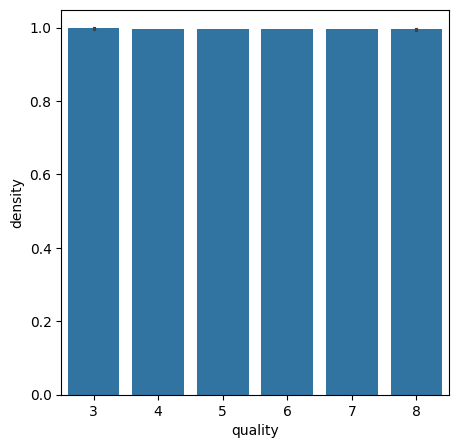

In [12]:
# density vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='density',data=data)

<Axes: xlabel='quality', ylabel='alcohol'>

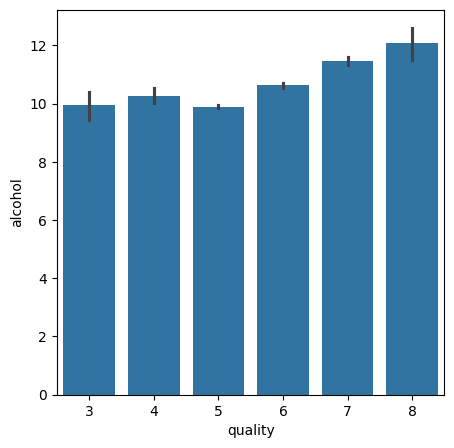

In [13]:
#alcohol vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=data)

# Correlation

In [14]:
correlation = data.corr()

<Axes: >

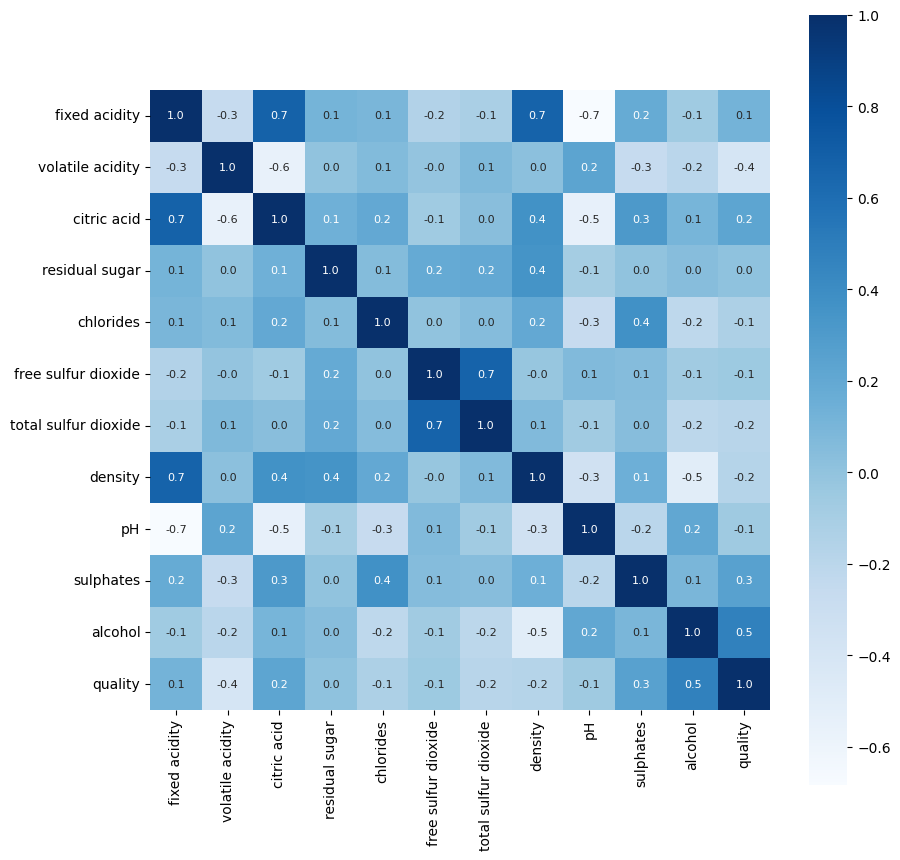

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [16]:
#dividing the label and unlabel data
x= data.drop(columns='quality',axis=1)

# Label Binarization

In [17]:
y = data['quality'].apply(lambda y_value : 1 if y_value >=7 else 0)

In [18]:
#spliting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [19]:
model  = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
#Accuracy of training data
x_train_pred = model.predict(x_train)
accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy of training data: ",accuracy)


Accuracy of training data:  1.0


In [21]:
x_test_pred = model.predict(x_test)
accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy of testing data :",accuracy)

Accuracy of testing data : 0.915625


# Building a prediction system

In [22]:
input_data = (7.6,0.41,0.24,1.8,0.08,4,11,0.9962,3.28,0.59,9.5)

#chaning the data into arrray
input_data = np.asarray(input_data)
#reshaping the data so that we can predict the input value

input_data = input_data.reshape(1,-1)


#Making prediction 
prediction = model.predict(input_data)

if prediction[0] == 1:
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

Bad Quality Wine


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
